In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel("default of credit card clients.xls",
                  header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- **X2**: Gender (1 = male; 2 = female).
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- **X4**: Marital status (1 = married; 2 = single; 3 = others).
- **X5**: Age (year).
- **X6 - X11**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

- **ID**: the id number assigned to each customer
- **LIMIT_BAL**: credit limit
- **SEX**: gender
- **EDUCATION**: level of education
- **MARRIAGE**: marital status
- **AGE**: age
- **PAY_**: when the last 6 bills were payed
- **BLL_AMT**: what the last 6 bills were
- **PAY_AMT**: how much the last payments were
- **default payment next month**

In [5]:
df.rename({'default payment next month': 'DEFAULT'}, axis = 'columns', 
          inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.drop('ID',axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.shape

(30000, 24)

In [8]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

- **LIMIT_BAL**, the amount of available credit **Integer**
- **SEX**: **Category**
    - 1 = male
    - 2 = female
- **EDUCATION**: **Category**
    - 1 = graduate school
    - 2 = university
    - 3 = high school
    - 4 = others
- **MARRIAGE**: **Category**
    - 1 = Married
    - 2 = Single
    - 3 = Others
- **AGE**: **Integer**
- **PAY_**: when the last 6 bills were payed **Category**
    - -1 = Paid on time
    - 1 = Payment delayed by 1 month
    - 2 = Payment delayed by 2 months
    - ...
    - 8 = Payment delayed by 8 months
    - 9 = Payment delayed by 9 or more months
- **BLL_AMT**: what the last 6 bills were **Integer**
- **PAY_AMT**: how much the last payments were **Integer**
- **default payment next month**
    - 0 = Dit not default
    - 1 = Defaulted

<Axes: xlabel='DEFAULT', ylabel='count'>

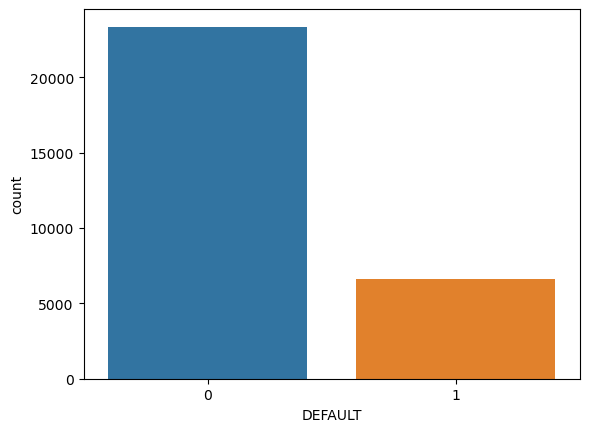

In [9]:
sns.countplot(x=df['DEFAULT'])

In [10]:
sim = df['DEFAULT'] == 1
nao = df['DEFAULT'] == 0
total = len(df['DEFAULT'])
proporcao_sim = sim.sum()/total
proporcao_nao = nao.sum()/total
print(f"Sim: {proporcao_sim:.2f} %")
print(f"Não: {proporcao_nao:.2f} %")

Sim: 0.22 %
Não: 0.78 %


In [11]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [12]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [13]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [14]:
len(df.loc[(df['EDUCATION']) == 0 | (df['MARRIAGE'] == 0)])

18

In [15]:
print("Porcentagem dos dados faltantes: ")
print(f"{(len(df.loc[(df['EDUCATION']) == 0 | (df['MARRIAGE'] == 0)])/len(df))*100} %")

Porcentagem dos dados faltantes: 
0.06 %


In [16]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [17]:
len(df_no_missing)

29932

### Downsample dos dados

In [18]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [19]:
df_no_default_downsampled = resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_no_default_downsampled)

1000

In [20]:
df_default_downsampled = resample(df_default,
                                 replace=False,
                                 n_samples=1000,
                                 random_state=42)
len(df_default_downsampled)

1000

In [21]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

In [22]:
X = df_downsample.drop('DEFAULT', axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [23]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [24]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                      'EDUCATION',
                                      'MARRIAGE',
                                      'PAY_0',
                                      'PAY_2',
                                      'PAY_3',
                                      'PAY_4',
                                      'PAY_5',
                                      'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Construindo um modelo preliminar

In [51]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

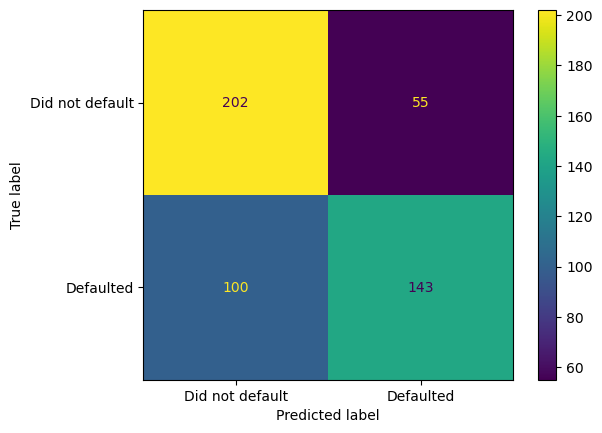

In [52]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                                     X_test_scaled,
                                     y_test,
                                     values_format='d',
                                     display_labels=['Did not default','Defaulted'])

Dos que did not default, o modelo acertou 0.78%.

Dos que defaulted, o modelo acertou 0.60%

In [53]:
y_pred = clf_svm.predict(X_test_scaled)

print("------ Métricas de desempenho nos dados de teste ------")
print(f"Acurácia: {accuracy_score(y_test,y_pred):.2f}")
print(f"Precisão: {precision_score(y_test,y_pred):.2f}")
print(f"Recall: {recall_score(y_test,y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test,y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pred):.2f}")

------ Métricas de desempenho nos dados de teste ------
Acurácia: 0.69
Precisão: 0.72
Recall: 0.59
F1 Score: 0.65
ROC-AUC: 0.69


### Otimizando os parâmetros com GridSearchCV()

In [69]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
    'gamma':['scale',1,0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'sigmoid']}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring='roc_auc',
    verbose=0)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [70]:
clf_svm = SVC(C=1 , gamma=0.001 , kernel = 'rbf')
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.001)

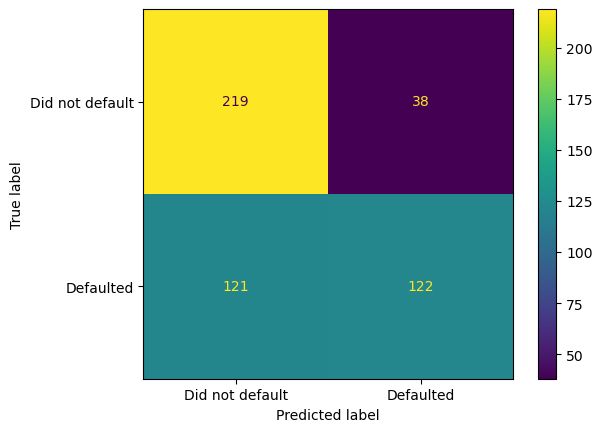

In [71]:
ConfusionMatrixDisplay.from_estimator(clf_svm,
                                     X_test_scaled,
                                     y_test,
                                     values_format='d',
                                     display_labels=['Did not default','Defaulted'])

Dos que did not default, o modelo acertou 0.79%.

Dos que defaulted, o modelo acertou 0.60%

Não houve uma melhora significativa

In [72]:
y_pred_otimi = clf_svm.predict(X_test_scaled)

print("------ Métricas de desempenho nos dados de teste ------")
print(f"Acurácia: {accuracy_score(y_test,y_pred_otimi):.2f}")
print(f"Precisão: {precision_score(y_test,y_pred_otimi):.2f}")
print(f"Recall: {recall_score(y_test,y_pred_otimi):.2f}")
print(f"F1 Score: {f1_score(y_test,y_pred_otimi):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test,y_pred_otimi):.2f}")

------ Métricas de desempenho nos dados de teste ------
Acurácia: 0.68
Precisão: 0.76
Recall: 0.50
F1 Score: 0.61
ROC-AUC: 0.68


### Principal Component Analysis

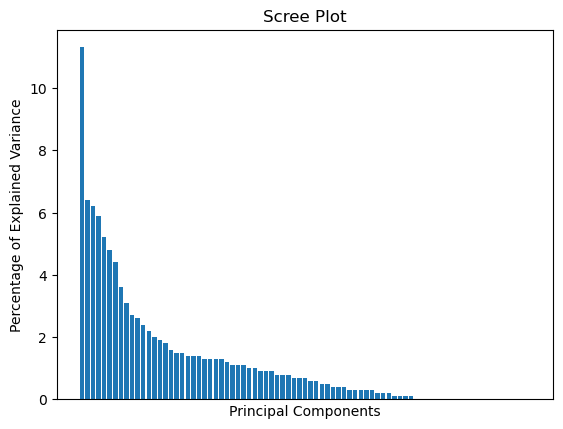

In [136]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range (1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom=False,
    top = False,
    labelbottom = False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [138]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [
    {'C':[1,10,100,1000],
    'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf']}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [139]:
clf_svm = SVC(random_state=42, C=1000, gamma = 0.001)
clf_svm.fit(pca_train_scaled, y_train)

SVC(C=1000, gamma=0.001, random_state=42)

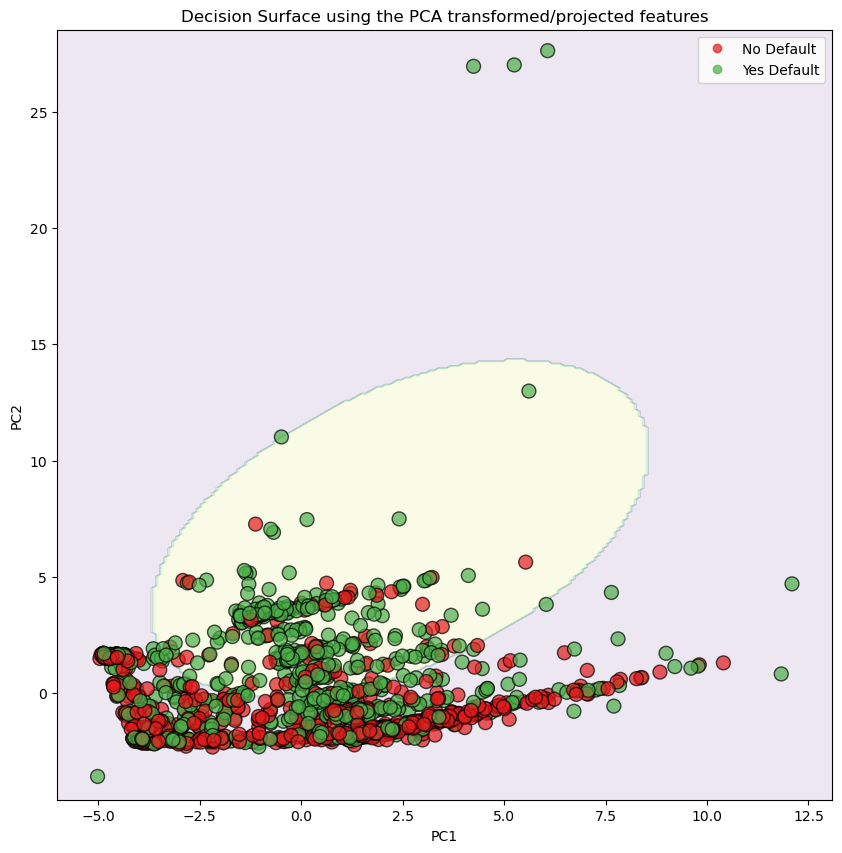

In [143]:
#X_test_pca = pca.transform(X_test_scaled)
X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start = x_min, stop = x_max, step = 0.1),
                    np.arange(start = y_min, stop = y_max, step = 0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx,yy,Z,alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = y_train,
                    cmap = cmap,
                    s=100,
                    edgecolors='k',
                    alpha= 0.7)

legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc='upper right')
legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Surface using the PCA transformed/projected features')
plt.show()

### Refazendo com todos os dados do dataset